# Iris flower classification models

The following notebook contains classification models for the iris flower database. The first prediction model uses a logisitc model regression with a softmax for multi class classification. The second approach will use a decision tree mode l for classification. 

Here are the steps undertaken to develope the models:

1) loading the data

2) visualize the data

3) prepare the data and train the model

4) validate the model


The data was downloaded from the UCI database
https://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
%matplotlib inline

import pandas as pd
import math as mat
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

from graphviz import Source


from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam


import seaborn as sns
sns.set(color_codes=True)

Using TensorFlow backend.


### Step 1 : Load the data

In [2]:
# load the data of the iris database
data = pd.read_csv('../data/iris.csv')
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2 : Visualize the data

Here a matrix plot of the four features (sepal-length, sepal-width, petal-length and petal-width) is generated.
We can clearly see the classes of iris flowers with the plot of the petal-length vs petal-width. Hence we woyld expect 
these two features to come out as classification boundries.

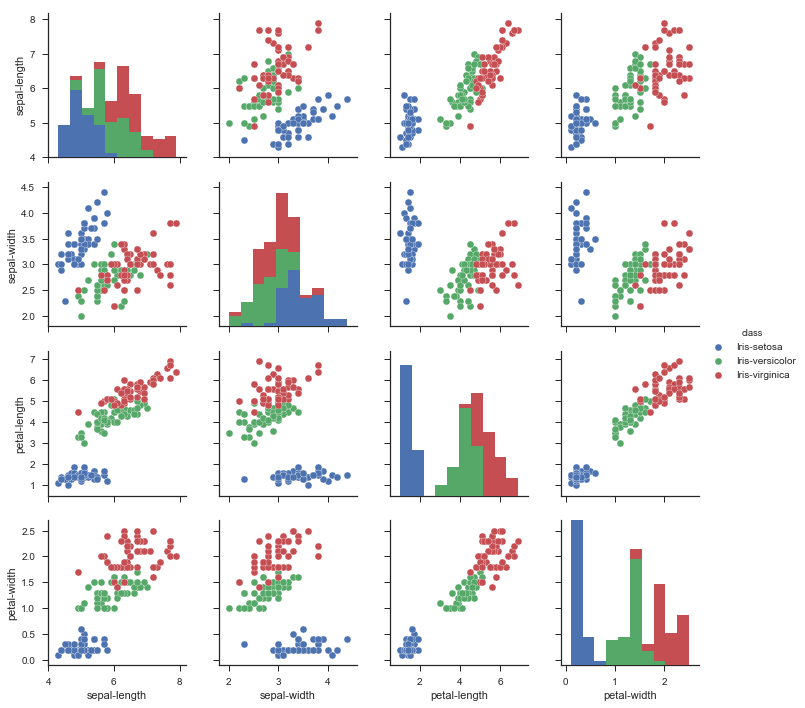

In [3]:
sns.set(style="ticks")

sns.pairplot(data, hue="class")

### Step 3a : Prepare the data and train the logistics model

In [4]:
# first we need to change the string flower classes for numerical attributes
data.loc[data['class'] == 'Iris-setosa', 'class'] = 1
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 2
data.loc[data['class'] == 'Iris-virginica', 'class'] = 3


In [5]:
# make an array for the features (X) and the targets (y)
y = data.as_matrix(columns=['class'])
X = data.iloc[:,0:4].values

# the data type of the targets must be changed to int values
y=y.astype('int')

# split the data set into a training portion (66%) and a test portion (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# train the logisitc model wit ha softmax for multi class predictio 
modelLog = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
modelLog.fit(X_train,y_train)

/Users/vincentroy/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Step 4a : Validate the logisitcs model

The prediction on the test set are made and compared to the actual labels of the test set. A difference vector is caluculated and the sum of the vector taken to get an idea for the number of false predeictions

In [7]:
# predict the values for the test set
pred = modelLog.predict(X_test)

In [8]:
# take the difference between the predicted values and the actual values from the test set. Then take the sum 
# of the differences to see how far off our model is and on how many predictions
diff = abs(pred - y_test[:,0])
diff.sum()

1

Only one prediction is off from in the test set. This is very good.

### Step 3b : Train the decision tree model

In [9]:
modelTree = DecisionTreeClassifier(max_depth=2)
modelTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Step 4b : Validate the decision tree model

In [10]:
# predict the values for the test set
predT = modelTree.predict(X_test)

# take the difference between the predicted values and the actual values from the test set. Then take the sum 
# of the differences to see how far off our model is and on how many predictions
diff = abs(predT - y_test[:,0])
diff.sum()

1

The decision tree model fits well the data. Only one observation in the test data set is not predicted correctly

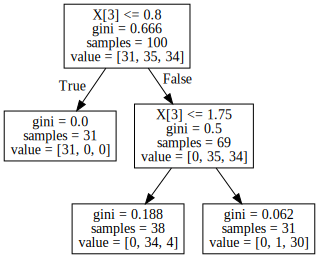

In [11]:
# graph the decision tree using the graphviz export tool from scikitlearn and the display in the notebook using the
# Source class from 
tree.export_graphviz(modelTree, out_file='tree.dot')
Source.from_file('tree.dot')

The dicision tree indicates that if the petal length (para X[2]) is smaller than 2.45 cm than it is an Iris-setosa with a probability of 31/31 = 100%, else if the petal width (para X[3]) is smaller than 1.75 cm then the flower is an Iris-versicolor with a probability of 34/38 = 89% and if not then the flower is an Iris-virginica with a probability of 30/31 = 96%.

Step 3c : Prepare the data and train the neural network

In [12]:
# one Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
yHot = encoder.fit_transform(y)


# split the data set into a training portion (66%) and a test portion (33%) using the one hot encoded values
X_train, X_test, y_train, y_test = train_test_split(X, yHot, test_size=0.33, random_state=42)

In [13]:
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.fit(X_train, y_train, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
 - 0s - loss: 1.3395 - acc: 0.3500
Epoch 2/200
 - 0s - loss: 1.2155 - acc: 0.3500
Epoch 3/200
 - 0s - loss: 1.1476 - acc: 0.2800
Epoch 4/200
 - 0s - loss: 1.1077 - acc: 0.3400
Epoch 5/200
 - 0s - loss: 1.0858 - acc: 0.3400
Epoch 6/200
 - 0s - loss: 1.0731 - acc: 0.3400
Epoch 7/200
 - 0s - loss: 1.0666 - acc: 0.3400
Epoch 8/200
 - 0s - loss: 1.0620 - acc: 0.3400
Epoch 9/200
 - 0s - loss: 1.0594 - acc: 0.3400
Epoch 10/200
 - 0s - loss: 1.0557 - acc: 0.3400
Epoch 11/200
 - 0s - loss: 1.0510 - acc: 0.3400
Epoch 12/200
 - 0s - loss: 1.0473 - acc: 0.3400
Epoch 13/200
 - 0s - loss: 1.0434 - acc: 0.3400
Epoch 14/200
 - 0s - loss: 1.0418 - acc: 0.3400
Epoch 15/200
 - 0s - loss: 1.0351 - acc: 0.3400
Epoch 16/200
 - 0s - loss: 1.0334 - acc: 0.3400
Epoch 17/200
 - 0s - loss: 1.0275 - acc: 0.3400
Epoch 18/200
 - 0s - loss: 1.0221 - acc: 0.3400
Epoch 19/200
 - 0s - loss: 1.0177 - acc: 0.3400
Epoch 20/200
 - 0s - loss: 1.0135 - acc: 0.3400
Epoch 21/200
 - 0s - loss: 1.0111 - acc: 0.3400
E

In [15]:
a = model.predict(X_test)

In [16]:
b = np.round(a,1)

In [17]:
c = np.where(b>0.5,1,0)
c

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [18]:
d = np.where(c[:,1]>0,2,0)

In [19]:
d

array([2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 0])

In [20]:
e = np.where(c[:,2]>0,3,0)
e

array([0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 3])

In [21]:
f = c[:,0] + d + e

In [22]:
f

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1, 1, 2,
       0, 3, 2, 3])